## ALL NECESSARY IMPORTS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

## LOADING DATA

In [4]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## EDA

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
print(train.describe())
print()
print(train.info())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data col

In [8]:
def bar_plot(variable):
    """
    input : variable ex : "Sex"
    output : bar plot & value count
    """
    # get feature
    var = train[variable]
    #count number of categorical variable (value / sample)
    varValue = var.value_counts()
    #visualize

    plt.figure(figsize = (9,3))
    plt.bar(varValue.index , varValue)
    plt.xticks(varValue.index , varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

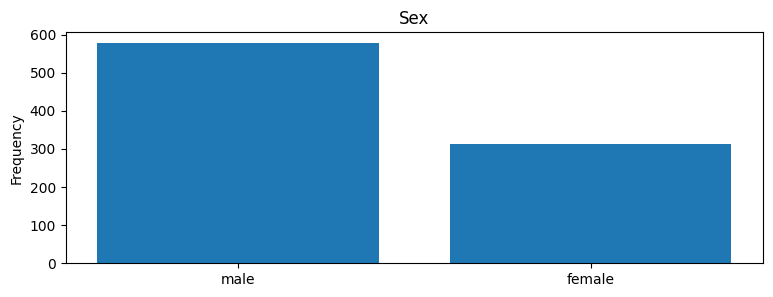

Sex: 
 Sex
male      577
female    314
Name: count, dtype: int64


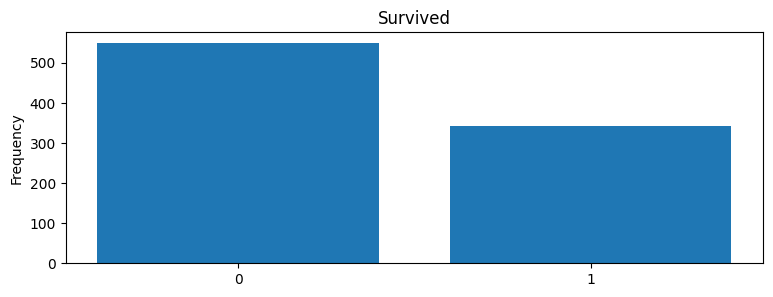

Survived: 
 Survived
0    549
1    342
Name: count, dtype: int64


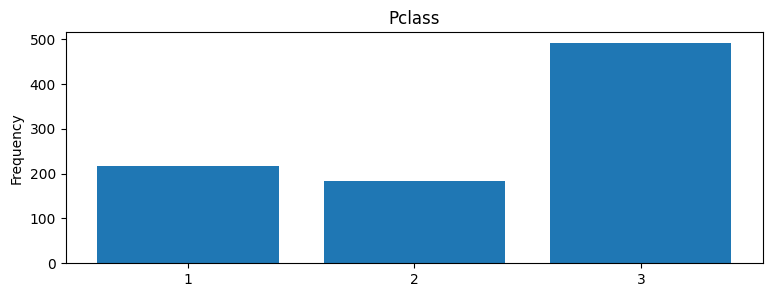

Pclass: 
 Pclass
3    491
1    216
2    184
Name: count, dtype: int64


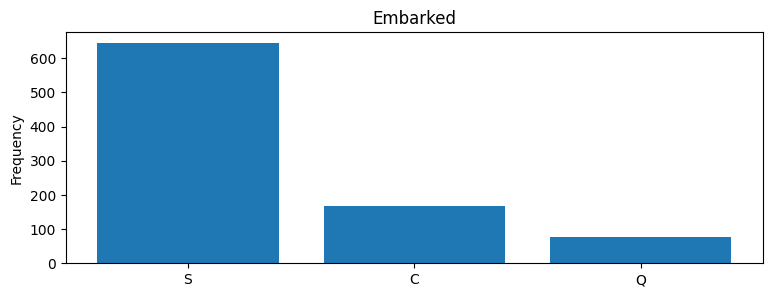

Embarked: 
 Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


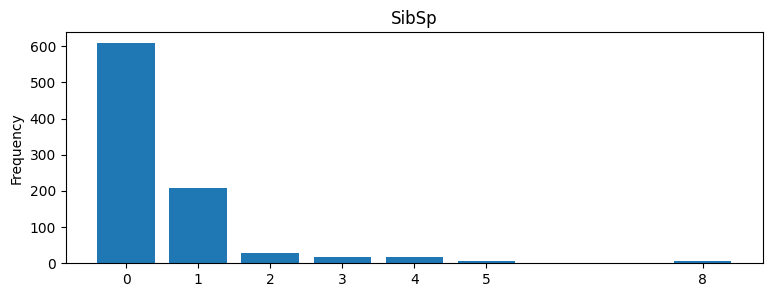

SibSp: 
 SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64


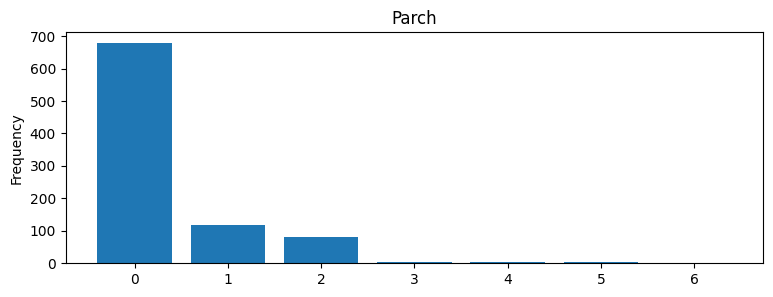

Parch: 
 Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64


In [9]:
category1 = ["Sex","Survived","Pclass","Embarked","SibSp", "Parch"]
for c in category1:
    bar_plot(c)

In [12]:
# MISSING
null_counts = train.isnull().sum()
null_counts = null_counts[null_counts>0]
print(null_counts)

Age         177
Cabin       687
Embarked      2
dtype: int64


In [15]:
train['Age'] = train['Age'].fillna(train['Age'].mean())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

test['Age'] = test['Age'].fillna(test['Age'].median())
test['Fare'] = test['Fare'].fillna(test['Fare'].median())

In [20]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,30.0000,C


In [35]:
test

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0,8.0500,S
414,1306,1,female,39.0,0,0,108.9000,C
415,1307,3,male,38.5,0,0,7.2500,S
416,1308,3,male,27.0,0,0,8.0500,S


In [36]:
# categorical to numerical using LabelEncoder

le_sex = LabelEncoder()
train['Sex'] = le_sex.fit_transform(train['Sex'])
test['Sex'] = le_sex.fit_transform(test['Sex'])


le_embarked = LabelEncoder()
train['Embarked'] = le_embarked.fit_transform(train['Embarked'])
test['Embarked'] = le_embarked.fit_transform(test['Embarked'])

## Modelling

In [68]:
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = tts(train[['Sex', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked']], train[['Survived']], test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100),
}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(model_name)
    print(accuracy)
    print('*'*20)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-68-90047125f390>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Logistic Regression
0.7597765363128491
********************
Random Forest
0.8044692737430168
********************


In [69]:
# creating random forest object that uses 100 trees
R_Forest = RandomForestClassifier(n_estimators = 100)
R_Forest.fit(train[['Sex', 'Pclass', 'Fare', 'Embarked']], train[['Survived']])
y_pred = R_Forest.predict(test[['Sex', 'Pclass', 'Fare', 'Embarked']])

<ipython-input-69-12f810c00d41>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  R_Forest.fit(train[['Sex', 'Pclass', 'Fare', 'Embarked']], train[['Survived']])


In [70]:
df = pd.DataFrame()
df['PassengerId'] = test['PassengerId']
df['Survived'] = y_pred

In [71]:
print(f"Accuracy  = 0.8044692737430168")

Accuracy  = 0.8044692737430168


In [72]:
df.to_csv('final.csv', index = None)